Импорт библиотек

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

1. Генерация тестовых данных (случайные города на плоскости, разыгрываются координаты x, y)

In [2]:
num_cities = 20
cities = {i: (random.random() * 100, random.random() * 100) for i in range(num_cities)}

2. Функция для расчета расстояния между двумя городами (основная метрика задачи)

In [5]:
def distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

3. Функция для расчета общей длины маршрута (параметр оптимизации, должен быть минимальным)

In [4]:
def total_distance(route):
    dist = 0
    for i in range(len(route)):
        dist += distance(route[i], route[(i + 1) % len(route)])
    return dist

4. Функция приспособленности

In [6]:
def fitness(route):
    return 1 / total_distance(route)

5. Создание начальной популяции

In [7]:
def create_initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

6. Турнирная селекция

In [8]:
def selection(population, fitnesses, tournament_size=3):
    selected = random.sample(list(zip(population, fitnesses)), tournament_size)
    selected.sort(key=lambda x: x[1], reverse=True) # Сортируем по приспособленности
    return selected[0][0] # Возвращаем лучшего из турнира

7. Упорядоченный кроссовер (OX)

In [9]:
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    start, end = sorted(random.sample(range(size), 2))

    # Копируем сегмент от parent1
    child[start:end+1] = parent1[start:end+1]

    # Заполняем остальные города из parent2, сохраняя порядок
    pointer = 0
    for i in range(size):
        if child[i] == -1:
            while parent2[pointer] in child:
                pointer += 1
            child[i] = parent2[pointer]
    return child

8. Мутация (перестановка двух городов)

In [14]:
def mutate(route, mutation_rate=0.05):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

9. Основной цикл ГА

Поколение 0: Лучшая длина = 782.10
Поколение 50: Лучшая длина = 446.88
Поколение 100: Лучшая длина = 446.34
Поколение 150: Лучшая длина = 446.34
Поколение 200: Лучшая длина = 446.34
Поколение 250: Лучшая длина = 446.34
Поколение 300: Лучшая длина = 446.34
Поколение 350: Лучшая длина = 446.34
Поколение 400: Лучшая длина = 446.34
Поколение 450: Лучшая длина = 446.34

Лучший маршрут: [0, 10, 3, 17, 9, 1, 4, 8, 2, 14, 7, 12, 6, 16, 13, 18, 15, 5, 19, 11]
Длина лучшего маршрута: 446.34


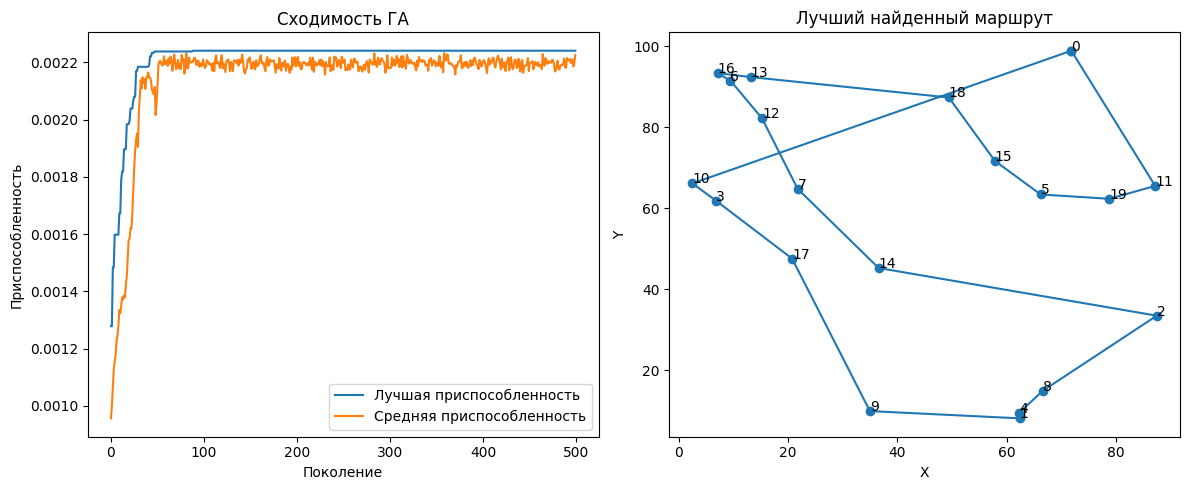

In [15]:
population_size = 100
generations = 500
mutation_rate = 0.1
elitism_count = 2 # Сколько лучших особей переходит в следующее поколение

population = create_initial_population(population_size, num_cities)
best_fitness_history = []
avg_fitness_history = []

for generation in range(generations):
    # Оценка приспособленности
    fitnesses = [fitness(ind) for ind in population]

    # Статистика
    best_fitness = max(fitnesses)
    avg_fitness = sum(fitnesses) / len(fitnesses)
    best_fitness_history.append(best_fitness)
    avg_fitness_history.append(avg_fitness)

    # Находим лучшую особь
    best_individual = population[np.argmax(fitnesses)]

    # Новая популяция (с элитизмом)
    new_population = []

    # Элитизм: переносим лучших
    sorted_population = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    new_population.extend(sorted_population[:elitism_count])

    # Заполняем остальную часть популяции
    while len(new_population) < population_size:
        parent1 = selection(population, fitnesses)
        parent2 = selection(population, fitnesses)
        child = ordered_crossover(parent1, parent2)
        child = mutate(child, mutation_rate)
        new_population.append(child)

    population = new_population

    # Визуализация каждые 50 поколений
    if generation % 50 == 0:
        print(f"Поколение {generation}: Лучшая длина = {total_distance(best_individual):.2f}")

# Финальный результат
print(f"\nЛучший маршрут: {best_individual}")
print(f"Длина лучшего маршрута: {total_distance(best_individual):.2f}")

# 10. Визуализация результатов
plt.figure(figsize=(12, 5))

# График сходимости
plt.subplot(1, 2, 1)
plt.plot(best_fitness_history, label='Лучшая приспособленность')
plt.plot(avg_fitness_history, label='Средняя приспособленность')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность')
plt.legend()
plt.title('Сходимость ГА')

# График лучшего маршрута
plt.subplot(1, 2, 2)
best_route = best_individual + [best_individual[0]] # Замыкаем маршрут
x = [cities[city][0] for city in best_route]
y = [cities[city][1] for city in best_route]
plt.plot(x, y, 'o-')
plt.title('Лучший найденный маршрут')
plt.xlabel('X')
plt.ylabel('Y')
for i, city in enumerate(best_route[:-1]):
    plt.annotate(str(city), (x[i], y[i]))

plt.tight_layout()
plt.show()